In [19]:
import numpy as np
import pandas as pd
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [20]:
df = pd.read_excel('StudentPerformanceFactors.xlsx')
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('StudentPerformanceFactors.xlsx')

# Display the first 20 rows of the DataFrame
print(df.head(20))
df.head(20)

    Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0              23          84                  Low                High   
1              19          64                  Low              Medium   
2              24          98               Medium              Medium   
3              29          89                  Low              Medium   
4              19          92               Medium              Medium   
5              19          88               Medium              Medium   
6              29          84               Medium                 Low   
7              25          78                  Low                High   
8              17          94               Medium                High   
9              23          98               Medium              Medium   
10             17          80                  Low                High   
11             17          97               Medium                High   
12             21          83         

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [21]:
df.shape

(6607, 20)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [23]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [24]:
# Mengisi nilai kosong pada kolom numerik menggunakan median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Mengisi nilai kosong pada kolom kategorikal menggunakan modus (mode)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Mengecek kembali apakah masih ada nilai kosong
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [25]:
df.to_csv('StudentPerformance_Cleaned.csv', index=False)
print("Dataset bersih telah disimpan sebagai 'StudentPerformance_Cleaned.csv'")


Dataset bersih telah disimpan sebagai 'StudentPerformance_Cleaned.csv'


Korelasi masing-masing fitur terhadap kelulusan siswa (Pass_Fail):
Hours_Studied                NaN
Attendance                   NaN
Parental_Involvement         NaN
Access_to_Resources          NaN
Extracurricular_Activities   NaN
Sleep_Hours                  NaN
Previous_Scores              NaN
Motivation_Level             NaN
Internet_Access              NaN
Tutoring_Sessions            NaN
Family_Income                NaN
Teacher_Quality              NaN
School_Type                  NaN
Peer_Influence               NaN
Physical_Activity            NaN
Learning_Disabilities        NaN
Parental_Education_Level     NaN
Distance_from_Home           NaN
Gender                       NaN
Exam_Score                   NaN
Pass_Fail                    NaN
Name: Pass_Fail, dtype: float64


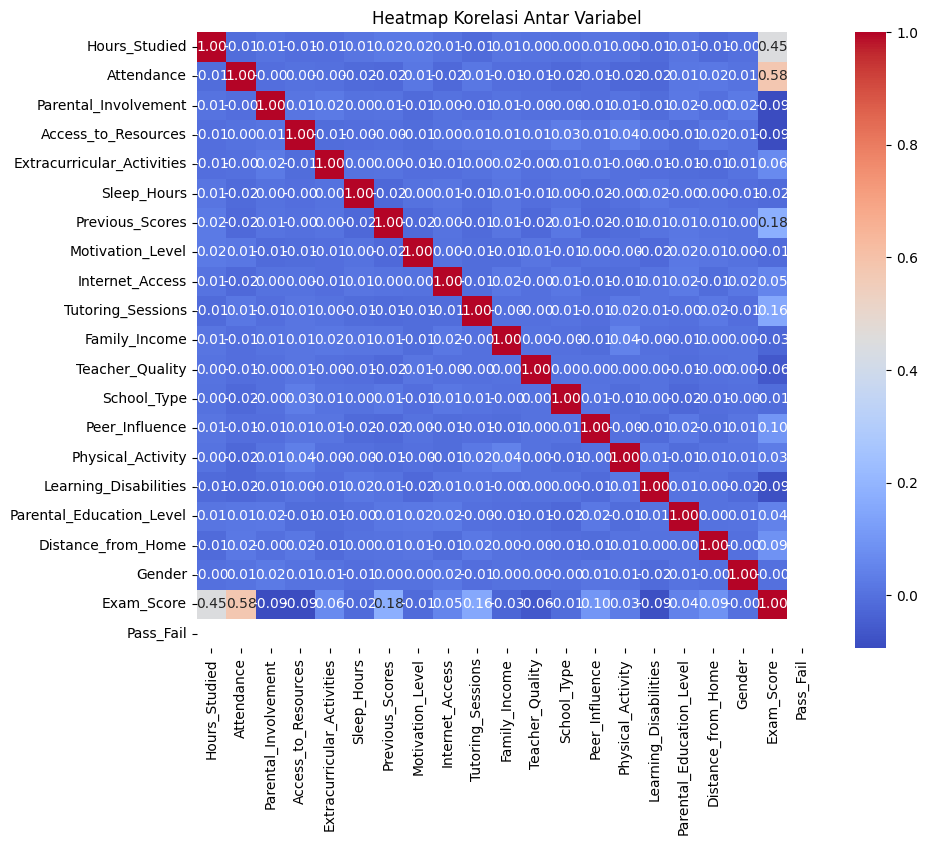

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan target variable numerik
df['Pass_Fail'] = df['Pass_Fail'].map({'Pass': 1, 'Fail': 0})

# Hitung korelasi
correlation_matrix = df.corr()

# Korelasi fitur terhadap target 'Pass_Fail'
correlation_with_target = correlation_matrix['Pass_Fail'].sort_values(ascending=False)

print("Korelasi masing-masing fitur terhadap kelulusan siswa (Pass_Fail):")
print(correlation_with_target)

# Visualisasi korelasi sebagai heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Step 1: Create a binary target for 'Pass' or 'Fail' based on Exam_Score
df['Pass_Fail'] = df['Exam_Score'].apply(lambda x: 'Pass' if x >= 60 else 'Fail')



In [28]:
# Step 2: Encode categorical variables using LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [29]:
# Step 3: Define features and target
X = df.drop(columns=['Exam_Score', 'Pass_Fail'])  # Features
y = df['Pass_Fail']  # Target


In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a RandomForestClassifier model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.99      1.00      1.00      1311

    accuracy                           0.99      1322
   macro avg       1.00      0.55      0.58      1322
weighted avg       0.99      0.99      0.99      1322

